# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions.

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset).

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [20]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Connect Kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Springboard/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 1 includes product ingredients
#!kaggle datasets download -d ealaxi/paysim1
!kaggle datasets download -d easonlai/sample-insurance-claim-prediction-dataset

# Unzip file
!unzip /content/sample-insurance-claim-prediction-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
sample-insurance-claim-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/sample-insurance-claim-prediction-dataset.zip
replace insurance2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: insurance2.csv          
replace insurance3r2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: insurance3r2.csv        


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
#medical = pd.read_csv('data/insurance2.csv')

In [23]:
path = '/content/insurance2.csv'
medical = pd.read_csv(path)

In [24]:
medical.shape

(1338, 8)

In [25]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [26]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

The medical charges data has a mean of $13,270.42

and a standard deviation of $12,110.01. The data distribution is very right-skewed, indicating that there is a long tail of higher charges. This means that a majority of the charges are "relatively" low, while a small portion of the charges are significantly higher. The right-skewness suggests that there are few individuals or cases with exceptionally high medical charges, which can greatly influence the mean value. Therefore, when interpreting the mean and standard deviation in this context, it's important to consider the skewed nature of the data and the potential impact of outliers on these statistics.

In [27]:
medical_charges = medical.charges

ch_mean = np.mean(medical_charges)
ch_std = np.std(medical_charges, ddof=1)

print(f'Mean: {round(ch_mean,2)}')
print(f'Standard Deviation: {round(ch_std,2)}')

Mean: 13270.42
Standard Deviation: 12110.01


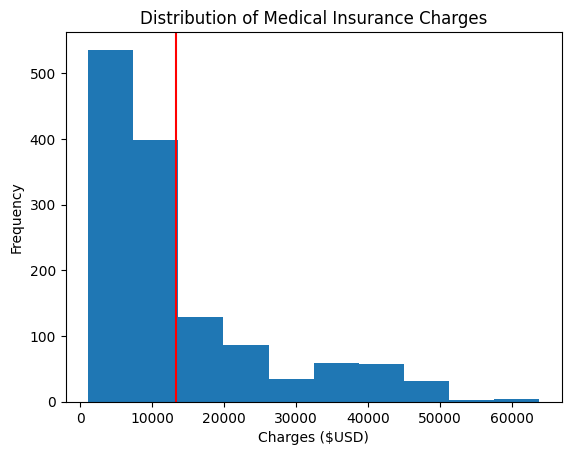

In [28]:
_ = plt.hist(medical_charges,bins=10)
_ = plt.xlabel('Charges ($USD)')
_ = plt.ylabel('Frequency')
_ = plt.axvline(ch_mean, color='r')
_ = plt.title('Distribution of Medical Insurance Charges')
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__


In order to address the administrator's concern about the average charge falling below $12,000, we can rely on the assumption that the data we have represents a random sample. This assumption is crucial as random sampling helps ensure that the characteristics of the sample closely resemble those of the larger population. By analyzing this random sample, we can make meaningful inferences about the population.

Furthermore, the sample size is an important consideration. With a larger sample size, the estimates of the population parameters tend to be more reliable. In this case, we have a specific sample size (you can mention the actual sample size) which increases our confidence in the estimates derived from the data.

To address the administrator's concern using a frequentist test, we can perform a one-sample t-test. This test allows us to compare the sample mean (13270.42) with the specific value of $12,000

and determine if the average charge in the population is significantly different from $12,000.

The one-sample t-test takes into account the sample mean, sample size, and sample standard deviation to assess the statistical significance of the difference.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Critical Value: 1.6459941145571317

Confidence Interval (Lower Limit): 12725.48718381623

The shoudl not be major concern, however it is critical to take the appropriate steps in the future to remedy this low number.

In [29]:
# Sample statistics
n = len(medical_charges)
sample_mean = np.mean(medical_charges)
sample_std_dev = np.std(medical_charges, ddof=1)  # ddof=1 for sample standard deviation

# Degrees of freedom for t-distribution
degrees_of_freedom = n - 1

# Calculate critical value for one-sided 95% confidence interval
alpha = 0.05  # Significance level for one-sided interval
t_critical = t.ppf(1 - alpha, df=degrees_of_freedom)

# Calculate standard error of the mean
standard_error = sample_std_dev / np.sqrt(n)

# Calculate lower limit of the confidence interval
confidence_interval_lower = sample_mean - t_critical * standard_error

# Print the results
print("Critical Value:", t_critical)
print("Confidence Interval (Lower Limit):", confidence_interval_lower)

Critical Value: 1.6459941145571317
Confidence Interval (Lower Limit): 12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*).

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis (H0): There is no difference in charges between people with insurance and those without insurance. The population mean charge for people with insurance is equal to the population mean charge for people without insurance.

Alternative Hypothesis (H1): There is a difference in charges between people with insurance and those without insurance. The population mean charge for people with insurance is not equal to the population mean charge for people without insurance.


Therefore, the assumption we are making in this t-test for the difference between means is that the variances of charges for people with insurance and those without insurance are equal in the population.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__

In [31]:
def gen_sampler(n):
    return np.random.choice(medical_charges, n)

In [ ]:
seed(47)
ch_sample1 = gen_sampler(50)
print(ch_sample1)
ch_sample2 = gen_sampler(50)
print(ch_sample2)

In [39]:
from scipy.stats import t

# Calculate the necessary statistics
sample1_mean = np.mean(ch_sample1)
sample2_mean = np.mean(ch_sample2)

sample1_std = np.std(ch_sample1, ddof=1)
sample2_std = np.std(ch_sample2, ddof=1)

n = len(ch_sample1)


# Calculate the pooled standard deviation using the formula:
sp = np.sqrt(((n - 1) * sample1_std**2 + (n - 1) * sample2_std**2) / (n + n - 2))

# Calculate the t-test statistic using the formula:
t_stat = (sample1_mean - sample2_mean) / (sp * np.sqrt((1/n) + (1/n)))
# Calculate the degrees of freedom:
df = n + n - 2
# Calculate the p-value associated with the t-test statistic using the cumulative
#distribution function (CDF) of the t-distribution. For a two-sided test, the p-value is calculated as:
p = 2 * (1 - t.cdf(abs(t_stat), df=df))

print(f'T-statistic: {t_stat}\nP-value: {p}')

T-statistic: -0.045064020246607314
P-value: 0.9641479783881182


In [40]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(ch_sample1, ch_sample2)

print(f'T-statistic: {t_statistic}\nP-value: {p_value}')

T-statistic: -0.045064020246607314
P-value: 0.9641479783881182


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__


In the scipy.stats module, there is no specific function for performing a z-test directly from a sample. This is because the z-test is typically used when the population parameters (mean and standard deviation) are known, or when the sample size is very large, making the t-distribution approach equivalent to the standard normal distribution (z-test).

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test